In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltS
import warnings #std library used to manage non-fatal alert messages (in our case they will be ignored)
warnings.filterwarnings("ignore") 

In [2]:
dataframe = pd.read_csv("data/sgemm_product.csv")
#find average of 4 runtimes to create target variable (make this an array, and apply it to the column only)
dataframe["Runtime"] = dataframe[["Run1 (ms)", "Run2 (ms)", "Run3 (ms)", "Run4 (ms)"]].mean(axis=1)
#drop the original four runs
dataframe.drop(["Run1 (ms)", "Run2 (ms)", "Run3 (ms)", "Run4 (ms)"], axis=1, inplace=True) #inplace -> action is performed on the original dataframe
dataframe.to_csv("data/sgemm_product_v2.csv", index=False)

In [3]:
df=pd.read_csv("data/sgemm_product_v2.csv")
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [4]:
df.shape

(241600, 15)

In [5]:
#missing values check
df.isna().sum()

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

In [6]:
#checking duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
#check null and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   MWG      241600 non-null  int64  
 1   NWG      241600 non-null  int64  
 2   KWG      241600 non-null  int64  
 3   MDIMC    241600 non-null  int64  
 4   NDIMC    241600 non-null  int64  
 5   MDIMA    241600 non-null  int64  
 6   NDIMB    241600 non-null  int64  
 7   KWI      241600 non-null  int64  
 8   VWM      241600 non-null  int64  
 9   VWN      241600 non-null  int64  
 10  STRM     241600 non-null  int64  
 11  STRN     241600 non-null  int64  
 12  SA       241600 non-null  int64  
 13  SB       241600 non-null  int64  
 14  Runtime  241600 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [8]:
#checking unique values in each column
df.nunique()

MWG             4
NWG             4
KWG             2
MDIMC           3
NDIMC           3
MDIMA           3
NDIMB           3
KWI             2
VWM             4
VWN             4
STRM            2
STRN            2
SA              2
SB              2
Runtime    120876
dtype: int64

In [9]:
#key stats of numerical features
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3341.507500


<Axes: >

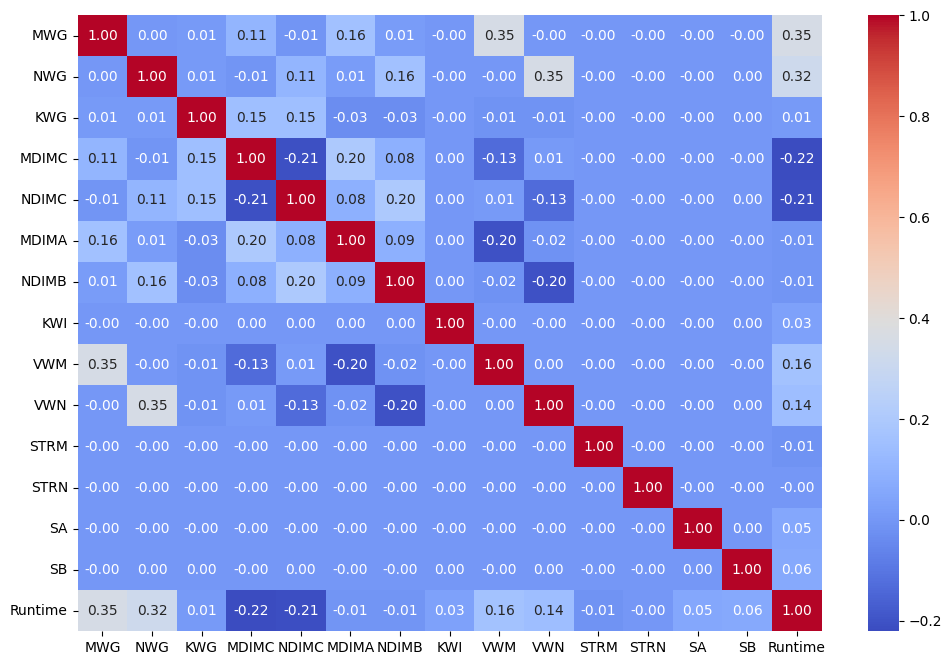

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#plotting heatmap to see how the 14 features affect the runtime and other features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

**Key Observations:**
- MWG and NWG have the highest positive correlation with Runtime (0.35 and 0.32). This suggests that as the Tile sizes get larger, the runtime generally increases (it takes longer).

- Negative Impact of Threads: MDIMC (-0.22) and NDIMC (-0.21) have the strongest negative correlations. This tells us thst adding more threads consistently lowers the runtime, making the GPU faster.

- There are giant blue blocks of 0.00. This suggests that that settings like STRM or SA were changed independently of others (there is no "hidden connection" between the input features).

<Axes: xlabel='Runtime', ylabel='Count'>

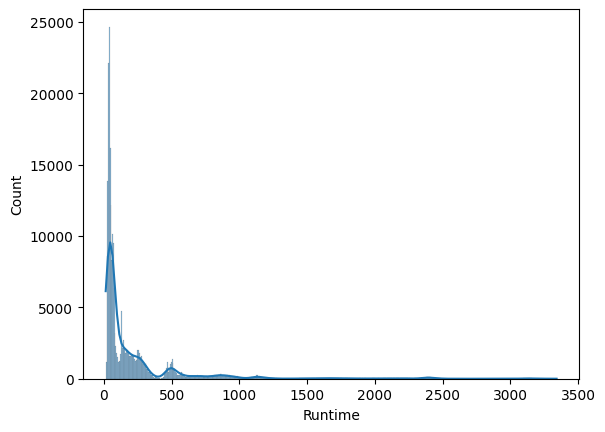

In [11]:
sns.histplot(df["Runtime"], kde=True) #plotting histogram to see how skewed data is

**Key Observations**:
- Extreme Right Skew: The massive spike on the far left shows that the vast majority of the GPU runs are very fast (under 200ms).

- The "Long Tail" Problem: The graph stretches all the way out to 3000ms+ with almost no data visible there. These are the outliers; they will pull our model's "average" prediction too high unless we use a Log Transformation to bring that tail back toward the center.

- Multi-modal Peaks: If you look closely at the "hump" near the start, there are several small mini-peaks. This suggests there are specific "clusters" of settings that consistently result in similar speeds.

<Axes: xlabel='SA', ylabel='Runtime'>

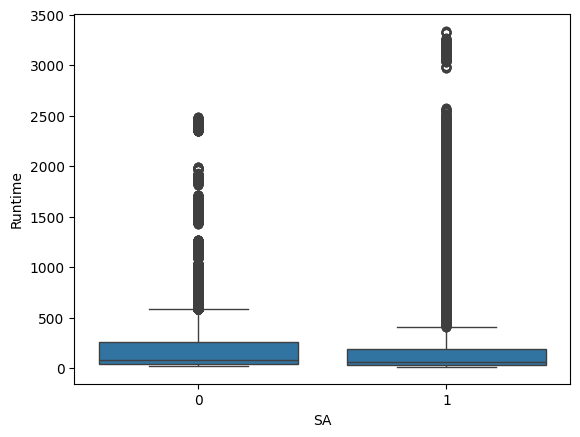

In [12]:
sns.boxplot(x="SA", y="Runtime", data=df) #plotting boxplot for the SA feature to see the overall "noise" or "spread" in our data

**Key Observations**:

- Efficiency of Shared Memory: Look at the "box" for 1 (Shared Memory ON) compared to 0 (OFF). The box for 1 is lower and flatter, meaning that using shared memory generally makes the GPU faster and more consistent.

- Outlier Chaos: Both settings have a "tower" of black dots (outliers) reaching up to 3000ms. This tells us that even with "Good" settings like SA=1, some other combination of features can still cause the GPU to run slowly.

- Median Similarity: The median lines (the horizontal line inside the boxes) are fairly close to each other. This suggests that SA helps, but the real speed gains likely come from how SA interacts with MWG or MDIMC.